In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

from astropy.table import Table

Read in data:

In [2]:
# ASCII version:
# cat = Table.read('../data/quaia_G20.5_minimal.txt', format='ascii', 
#                 names=['source_id','l','b','redshift_quaia','redshift_quaia_err','phot_g_mean_mag'])

# Could do the same thing with the fits version
cat = Table.read('../data/quaia_G20.5.fits')

print("Columns:", cat.columns)
print("N =", len(cat))


Columns: <TableColumns names=('source_id','unwise_objid','redshift_quaia','redshift_quaia_err','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','mag_w1_vg','mag_w2_vg','pm','pmra','pmdec','pmra_error','pmdec_error')>
N = 1295502


Make apparent magnitude cut:

In [3]:
cat = cat[(cat['phot_g_mean_mag'] < 20.0)]
print("G<20.0: N =", len(cat))

G<20.0: N = 755850


Make redshift cut

In [4]:
z_min, z_max = 1.5, 3.0
cat_sub = cat[(cat['redshift_quaia'] > z_min) & (cat['redshift_quaia'] < z_max)]
print(f"{z_min} < z < {z_max}: N =", len(cat_sub))

1.5 < z < 3.0: N = 336661


Plot quasar distribution:

In [5]:
b_rad = np.pi/180. * cat_sub['b']

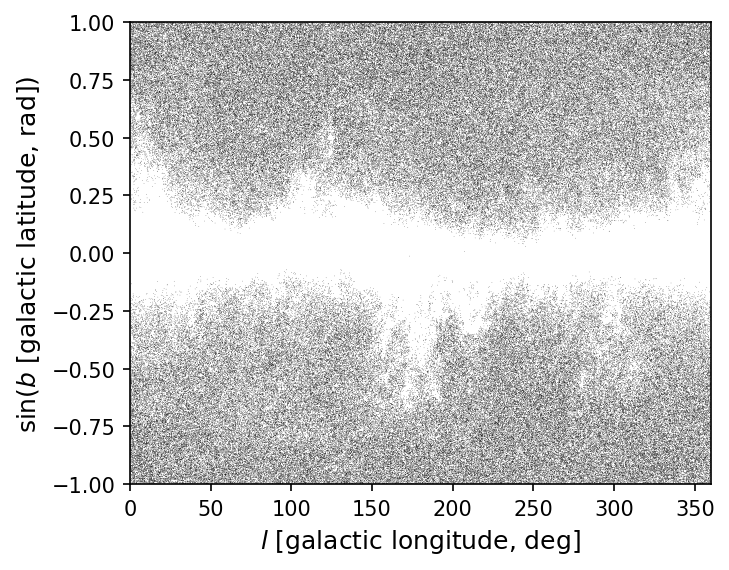

In [6]:
plt.figure(figsize=(5, 4))
plt.scatter(cat_sub['l'], np.sin(b_rad), marker='.', s=0.25, 
            facecolor='k', edgecolor='None', alpha=1)
plt.xlabel(r'$l$ [galactic longitude, deg]', fontsize=12)
plt.ylabel(r'sin($b$ [galactic latitude, rad])', fontsize=12)
plt.xlim(0, 360)
plt.ylim(-1, 1)
plt.savefig('../plots/2024-03-20_figures/quaia_G20.0_z1.5-3.0_galactic.png',
            bbox_inches='tight', dpi=150)